## Лабораторная работа №2
##  Кривогузов Владислав
### Вариант 5
1. Написать программу, которая обращает матрицу методом Гаусса с выбором главного элемента по столбцу. Применить программу к следующим ниже входным данным и вывести результат.
$$A=\left(
\begin{array}{ccccccc}
 -1 & -4 & -5 & -1 & 0 & -1 & -1 \\
 -1 & -4 & 0 & 4 & -4 & 0 & -4 \\
 -2 & -8 & -5 & -1 & 0 & -4 & 0 \\
 -4 & -16 & -10 & 2 & -4 & -2 & 0 \\
 -8 & -32 & -20 & 4 & -8 & 0 & -2 \\
 -16 & -64 & -40 & 8 & -16 & -7 & -4 \\
 5 & -5 & -5 & -2 & 0 & -2 & -1 \\
\end{array}
\right)$$
$$A=\left(
\begin{array}{cccccccccc}
 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 \\
 1 & 2 & 4 & 8 & 16 & 32 & 64 & 128 & 256 & 512 \\
 1 & 3 & 9 & 27 & 81 & 243 & 729 & 2187 & 6561 & 19683 \\
 1 & 4 & 16 & 64 & 256 & 1024 & 4096 & 16384 & 65536 & 262144 \\
 1 & 5 & 25 & 125 & 625 & 3125 & 15625 & 78125 & 390625 & 1953125 \\
 1 & 6 & 36 & 216 & 1296 & 7776 & 46656 & 279936 & 1679616 & 10077696 \\
 1 & 7 & 49 & 343 & 2401 & 16807 & 117649 & 823543 & 5764801 & 40353607 \\
 1 & 8 & 64 & 512 & 4096 & 32768 & 262144 & 2097152 & 16777216 & 134217728 \\
 1 & 9 & 81 & 729 & 6561 & 59049 & 531441 & 4782969 & 43046721 & 387420489 \\
 1 & 10 & 100 & 1000 & 10000 & 100000 & 1000000 & 10000000 & 100000000 & 1000000000 \\
\end{array}
\right)$$
$$A=\left(
\begin{array}{cccccccccc}
 5 & 3 & 3 & -4 & 5 & -5 & -4 & -5 & 0 & 2 \\
 5 & 3 & -1 & 2 & 3 & 0 & -4 & 1 & -4 & -5 \\
 10 & 6 & 2 & -3 & -2 & -2 & -1 & 0 & -3 & -5 \\
 20 & 12 & 4 & -5 & -1 & -4 & 4 & -2 & -2 & -4 \\
 40 & 24 & 8 & -10 & 5 & -1 & 5 & 2 & 0 & -3 \\
 80 & 48 & 16 & -20 & 10 & -12 & -3 & -3 & 3 & 2 \\
 160 & 96 & 32 & -40 & 20 & -24 & -3 & -4 & 1 & 4 \\
 320 & 192 & 64 & -80 & 40 & -48 & -6 & -11 & 0 & -3 \\
 640 & 384 & 128 & -160 & 80 & -96 & -12 & -22 & -5 & 2 \\
 -3 & -3 & 0 & 0 & 5 & 3 & -2 & 2 & 5 & -2 \\
\end{array}
\right)$$

Функция нахождения обратной матрицы с выбором главного элемента

In [1]:
import sympy as sp
import numpy as np
sp.init_printing()

def getInv(matrix):
    a = matrix.astype(float)
    n = matrix.shape[0]
    r = np.eye(n);
    #Прямой ход
    for k in range(n - 1):        
        #Нахожу главный элемент
        x = k
        for j in range(k + 1, n):
            if abs(a[j, k]) > abs(a[x, k]):
                x = j   
        #Меняю местами строки
        if x != k:
            a[k], a[x] = a[x], a[k].copy()
            r[k], r[x] = r[x], r[k].copy()        
        #Вычитаю из последующих
        for i in range(k + 1, n):            
            a[i, k] /= a[k, k]
            a[i, k+1:] -= a[i,k] * a[k, k+1:]            
            r[i, :] -= a[i,k] * r[k, :]    
    #Обратный ход     
    for i in range(1,n+1):
        r[n-i,:]*=1.0/a[n-i,n-i]       
        a[n-i,n-i]=1
        for k in range(n-i):
            r[k,:]-=a[k,n-i]*r[n-i,:]
            a[k,n-i]-=a[k,n-i]      
    return r

Первая матрица

In [2]:
A=[[-1,-4,-5,-1,0,-1,-1],
   [-1,-4,0,4,-4,0,-4],
   [-2,-8,-5,-1,0,-4,0],
   [-4,-16,-10,2,-4,-2,0],
   [-8,-32,-20,-4,-8,0,-2],
   [-16,-64,-40,8,-16,-7,-4],
   [5,-5,-5,-2,0,-2,-1]]
sp.Matrix(A)

⎡-1   -4   -5   -1   0   -1  -1⎤
⎢                              ⎥
⎢-1   -4    0   4   -4   0   -4⎥
⎢                              ⎥
⎢-2   -8   -5   -1   0   -4  0 ⎥
⎢                              ⎥
⎢-4   -16  -10  2   -4   -2  0 ⎥
⎢                              ⎥
⎢-8   -32  -20  -4  -8   0   -2⎥
⎢                              ⎥
⎢-16  -64  -40  8   -16  -7  -4⎥
⎢                              ⎥
⎣ 5   -5   -5   -2   0   -2  -1⎦

In [3]:
A1=sp.Matrix(getInv(np.matrix(A))) #Моя функция
A1

⎡-0.148235294117647   -0.0282352941176471  -0.0682352941176471  -0.07294117647
⎢                                                                             
⎢ 0.448823529411765    0.168823529411765   -0.0711764705882353  0.915294117647
⎢                                                                             
⎢       -0.45                -0.05                0.15                 -0.6   
⎢                                                                             
⎢-0.102941176470588   -0.102941176470588   -0.102941176470588   -0.41176470588
⎢                                                                             
⎢-0.455882352941176   -0.455882352941176   0.0441176470588235   -2.07352941176
⎢                                                                             
⎢-0.235294117647059   -0.235294117647059   -0.235294117647059   -0.94117647058
⎢                                                                             
⎣-0.0588235294117647  -0.0588235294117647  -0.058823

In [4]:
A2=sp.Matrix(A).inv() #Точная обратная
A2

⎡-63    -12    -29    -31                       ⎤
⎢────   ────   ────   ────   -1/50  3/85   4/25 ⎥
⎢425    425    425    425                       ⎥
⎢                                               ⎥
⎢763    287    -121    389          -93         ⎥
⎢────   ────   ─────   ───   1/200  ────   -1/25⎥
⎢1700   1700    1700   425          340         ⎥
⎢                                               ⎥
⎢-9/20  -1/20  3/20   -3/5   1/40   3/20     0  ⎥
⎢                                               ⎥
⎢                                    13         ⎥
⎢-7/68  -7/68  -7/68  -7/17  -1/8    ──      0  ⎥
⎢                                    68         ⎥
⎢                                               ⎥
⎢-31    -31           -141           43         ⎥
⎢────   ────   3/68   ─────  -1/8    ──      0  ⎥
⎢ 68     68             68           68         ⎥
⎢                                               ⎥
⎢                     -16                       ⎥
⎢-4/17  -4/17  -4/17  ────     0    5/17     0  ⎥


Вторая матрица

In [5]:
B=np.matrix([[(i + 1) ** j for j in range(10)] for i in range(10)])
sp.Matrix(B)

⎡1  1    1    1      1      1        1        1          1          1     ⎤
⎢                                                                         ⎥
⎢1  2    4    8     16      32      64       128        256        512    ⎥
⎢                                                                         ⎥
⎢1  3    9    27    81     243      729      2187      6561       19683   ⎥
⎢                                                                         ⎥
⎢1  4   16    64    256    1024    4096     16384      65536      262144  ⎥
⎢                                                                         ⎥
⎢1  5   25   125    625    3125    15625    78125     390625     1953125  ⎥
⎢                                                                         ⎥
⎢1  6   36   216   1296    7776    46656    279936    1679616    10077696 ⎥
⎢                                                                         ⎥
⎢1  7   49   343   2401   16807   117649    823543    5764801    40353607 ⎥
⎢           

In [6]:
B1=sp.Matrix(getInv(B)) #Моя функция
B1

⎡  9.99999999998474     -44.9999999999753      120.000000000232     -210.00000
⎢                                                                             
⎢ -19.2896825396614      109.303571428661      -311.47619047741      562.58333
⎢                                                                             
⎢  15.8557539682579     -103.502678571731      317.91984127191      -597.40833
⎢                                                                             
⎢ -7.31857363317568      52.5331349209368     -172.118650795296      337.30879
⎢                                                                             
⎢  2.09756944445664     -16.1060763890383      55.6208333340609      -113.4118
⎢                                                                             
⎢ -0.388252314818664     3.13315972226416     -11.2895833335248      23.849305
⎢                                                                             
⎢ 0.0465277777784621    -0.389930555562547     1.454

In [7]:
B2=sp.Matrix(B).inv()
B2

⎡   10        -45       120       -210      252      -210      120       -45  
⎢                                                                             
⎢ -4861       6121     -6541      6751    -6877      6961               3533  
⎢ ──────      ────     ──────     ────    ──────     ────    -1003/3    ────  
⎢  252         56        21        12       10        12                 28   
⎢                                                                             
⎢  79913    -115923    400579   -71689             -461789    22439    -39867 
⎢  ─────    ────────   ──────   ───────   5985/8   ────────   ─────    ───────
⎢   5040      1120      1260      120                720        60       280  
⎢                                                                             
⎢-663941     264767   -433739    728587   -62549    273431   -242639   435893 
⎢────────    ──────   ────────   ──────   ───────   ──────   ────────  ────── 
⎢ 90720       5040      2520      2160      144     

Матрица №3

In [8]:
C=  [[5 , 3 , 3 , -4 , 5 , -5 , -4 , -5 , 0 , 2 ],
    [ 5 , 3 , -1 , 2 , 3 , 0 , -4 , 1 , -4 , -5 ],
    [10 , 6 , 2 , -3 , -2 , -2 , -1 , 0 , -3 , -5 ],
    [20 , 12 , 4 , -5 , -1 , -4 , 4 , -2 , -2 , -4 ],
    [40 , 24 , 8 , -10 , 5 , -1 , 5 , 2 , 0 , -3 ],
    [80 , 48 , 16 , -20 , 10 , -12 , -3 , -3 , 3 , 2 ],
    [160 , 96 , 32 , -40 , 20 , -24 , -3 , -4 , 1 , 4 ],
    [320 , 192 , 64 , -80 , 40 , -48 , -6 , -11 , 0 , -3 ],
    [640 , 384 , 128 , -160 , 80 , -96 , -12 , -22 , -5 , 2 ],
    [-3 , -3 , 0 , 0 , 5 , 3 , -2 , 2 , 5 , -2]]
sp.Matrix(C)

⎡ 5    3    3    -4   5   -5   -4   -5   0   2 ⎤
⎢                                              ⎥
⎢ 5    3   -1    2    3    0   -4    1   -4  -5⎥
⎢                                              ⎥
⎢10    6    2    -3   -2  -2   -1    0   -3  -5⎥
⎢                                              ⎥
⎢20   12    4    -5   -1  -4    4   -2   -2  -4⎥
⎢                                              ⎥
⎢40   24    8   -10   5   -1    5    2   0   -3⎥
⎢                                              ⎥
⎢80   48   16   -20   10  -12  -3   -3   3   2 ⎥
⎢                                              ⎥
⎢160  96   32   -40   20  -24  -3   -4   1   4 ⎥
⎢                                              ⎥
⎢320  192  64   -80   40  -48  -6   -11  0   -3⎥
⎢                                              ⎥
⎢640  384  128  -160  80  -96  -12  -22  -5  2 ⎥
⎢                                              ⎥
⎣-3   -3    0    0    5    3   -2    2   5   -2⎦

In [9]:
C1=sp.Matrix(getInv(np.matrix(C)))
C1

⎡-0.674821428571429   -0.424821428571429   -0.299821428571429   -0.04982142857
⎢                                                                             
⎢ 0.306748866213153   0.0567488662131521   -0.0682511337868474  -0.79444160997
⎢                                                                             
⎢ 10.1690192743764     9.66901927437641     6.91901927437642     12.8475907029
⎢                                                                             
⎢ 5.74986394557823     5.74986394557823     3.74986394557823     7.60700680272
⎢                                                                             
⎢-0.564240362811791   -0.564240362811791   -0.564240362811791   -0.84995464852
⎢                                                                             
⎢ 0.212539682539683    0.212539682539683    0.212539682539683    0.21253968253
⎢                                                                             
⎢-0.415873015873016   -0.415873015873016   -0.415873

In [10]:
C2=sp.Matrix(C).inv() #Точная обратная
C2

⎡-3779    -2379    -1679     -279     -4339    -4409    -4549      -81       2
⎢──────   ──────   ──────    ─────    ──────   ──────   ──────     ────      ─
⎢ 5600     5600     5600      5600     5600     5600     5600      1120      5
⎢                                                                             
⎢108221   20021    -24079   -280279   180461   -43609   51451     74959    -19
⎢──────   ──────   ───────  ────────  ──────   ───────  ──────    ─────    ───
⎢352800   352800    352800   352800   352800    352800  352800    70560     35
⎢                                                                             
⎢358763   341123   244103    453263   368843   781073   529213   -100103   -26
⎢──────   ──────   ──────    ──────   ──────   ──────   ──────   ────────  ───
⎢35280    35280    35280     35280    35280    35280    35280      7056     35
⎢                                                                             
⎢ 84523    84523    55123    111823    87043   18973

Норма Фробениуса, или евклидова норма: 
$$||A||_F=\sum_{i=1}^n \sum_{j=1}^m a_{ij}^2$$

In [11]:
import math
def froNorm(matrix):
    sum=0
    for element in matrix:
        sum+=element*element
    sum=math.sqrt(sum)
    return sum    

In [12]:
print("Норма Фробениуса:")
print("||A1-A2||= {0}".format(np.linalg.norm(np.array(A2-A1).astype(np.float64),'fro')))
print("||B1-B2||= {0}".format(np.linalg.norm(np.array(B2-B1).astype(np.float64),'fro')))
print("||C1-C2||= {0}".format(np.linalg.norm(np.array(C2-C1).astype(np.float64),'fro')))
print("Тоже самое:")
print("||A1-A2||= {0}".format(froNorm(A1-A2)))
print("||B1-B2||= {0}".format(froNorm(B2-B1)))
print("||C1-C2||= {0}".format(froNorm(C2-C1)))

Норма Фробениуса:
||A1-A2||= 8.205810482861442e-16
||B1-B2||= 3.263947761196794e-08
||C1-C2||= 9.476572703435544e-15
Тоже самое:
||A1-A2||= 8.205810482861442e-16
||B1-B2||= 3.263947761196795e-08
||C1-C2||= 9.476572703435544e-15


3) Проведите экспериментальное исследование скорости обращения матрицы в зависимости от размерности системы, используя для тестов матрицу  A  со случайными числами. Постройте график зависимости времени работы от размерности. Матрицу какой размерности ваша программа на вашем компьютере может обратить за одну минуту?

In [19]:
import time 
import random
import matplotlib.pyplot as plt

def test(maxTime,step,f):
    sec=[0]
    dim=[0]
    k=0
    while (sec[-1]<maxTime):
        k+=step
        buf = [[random.random()*1.0 for j in range(k)] for i in range(k)]
        A = np.matrix(buf)
        start_time = time.time()
        f(A)
        sec.append(time.time()-start_time)
        dim.append(k)
        print("{0}x{0}:{1}".format(k,sec[-1]))    
    return dim,sec

Тестирую мою функцию:

100x100:0.21143460273742676
200x200:0.7674078941345215
300x300:1.7372658252716064
400x400:3.1973929405212402
500x500:5.106001138687134
600x600:8.202113628387451
700x700:10.61384916305542
800x800:15.046605825424194
900x900:18.326390266418457
1000x1000:21.188722610473633
1100x1100:28.28832983970642
1200x1200:33.18138766288757
1300x1300:37.89901781082153
1400x1400:47.6603627204895
1500x1500:53.762513637542725
1600x1600:57.28136086463928
1700x1700:70.00330090522766


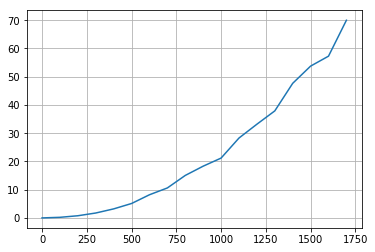

In [16]:
result=test(60,100,getInv)
plt.plot(result[0],result[1])
plt.grid(1)
plt.show()

Тестирую функцию из numpy:

500x500:0.013032913208007812
1000x1000:0.07874846458435059
1500x1500:0.17052698135375977
2000x2000:0.44411754608154297
2500x2500:0.7187948226928711
3000x3000:1.2657268047332764
3500x3500:2.0628442764282227
4000x4000:3.110848903656006
4500x4500:3.975506544113159
5000x5000:6.008730888366699
5500x5500:7.391329765319824
6000x6000:10.426461935043335
6500x6500:13.240525960922241
7000x7000:16.435394048690796
7500x7500:21.722403287887573
8000x8000:26.662900686264038
8500x8500:29.803552389144897
9000x9000:34.43401479721069
9500x9500:39.36234641075134
10000x10000:42.50216770172119
10500x10500:49.5944459438324
11000x11000:58.45524477958679
11500x11500:64.7985827922821


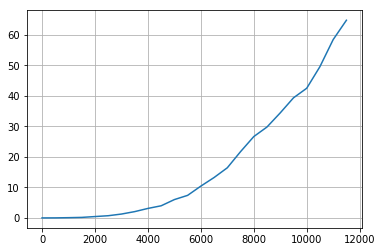

In [20]:
result=test(60,500,np.linalg.inv)
plt.plot(result[0],result[1])
plt.grid(1)
plt.show()

За минуту моя функция может обратить мартрицу размерности 1700х1700. Функция из numpy - 11500х11500